In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [255]:
import warnings

warnings.filterwarnings("ignore")

# 

## Read data

In [256]:
df = pd.read_csv('guitar-data.csv')
df

,name,brand,price,fret-amount,string-amount,scale,body,body-material
0,IBANEZ GRG121DX-BKF,IBANEZ,27.60,22,6,25.5,Modern stat,тополь
1,ROCKDALE Stars Black Limited Edition HSS BK,ROCKDALE,13.30,24,6,24.5,Stratocaster,тополь
2,IBANEZ GRX70QA-TRB,IBANEZ,23.94,24,6,25.5,Superstrat,тополь
3,ROCKDALE Stars HSS BK,ROCKDALE,12.20,24,6,25.5,Stratocaster,тополь
4,IBANEZ GRG121DX-WNF,IBANEZ,27.90,22,6,25.5,Superstrat,красное дерево
...,...,...,...,...,...,...,...,...
2523,"GRETSCH G2655 Streamliner C/Block Jr. DC, V-St...",GRETSCH,84.00,22,6,26.5,Superstrat,тополь
2524,"GRETSCH G2622 Streamliner C/Block DC, V-Stopta...",GRETSCH,86.00,24,6,26.5,Modern stat,ольха
2525,"GRETSCH G2622 Streamliner C/Block DC, V-Stopta...",GRETSCH,86.00,24,6,24.5,Stratocaster,тополь
2526,"GRETSCH G2655 Streamliner C/Block Jr. DC, V-St...",GRETSCH,86.00,22,6,26.5,Stratocaster,красное дерево


# 

## EDA

In [257]:
df.shape

(2528, 8)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2523 non-null   object 
 1   brand          2523 non-null   object 
 2   price          2523 non-null   float64
 3   fret-amount    2528 non-null   int64  
 4   string-amount  2528 non-null   int64  
 5   scale          2528 non-null   float64
 6   body           2528 non-null   object 
 7   body-material  2528 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 158.1+ KB


In [259]:
df.nunique()

name             2475
brand             120
price             950
fret-amount         2
string-amount       1
scale              21
body               17
body-material      23
dtype: int64

In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2523.0,98.085257,109.059848,7.142,30.9725,66.0,123.000,1569.0
fret-amount,2528.0,22.975475,0.999897,22.000,22.0000,22.0,24.000,24.0
string-amount,2528.0,6.000000,0.000000,6.000,6.0000,6.0,6.000,6.0
scale,2528.0,25.442154,0.801413,18.750,24.5000,25.5,26.125,34.0


Handle null values

In [261]:
df.isnull().sum()

name             5
brand            5
price            5
fret-amount      0
string-amount    0
scale            0
body             0
body-material    0
dtype: int64

In [262]:
df = df.dropna()
df.isnull().sum()

name             0
brand            0
price            0
fret-amount      0
string-amount    0
scale            0
body             0
body-material    0
dtype: int64

#  

In [263]:
brand_counts = df['brand'].value_counts()
brands_to_replace = brand_counts[brand_counts <= 15].index
df['brand'] = df['brand'].apply(lambda x: 'other' if x in brands_to_replace else x)

brand_counts = df['brand'].value_counts()
BRANDS = brand_counts.index.tolist()

In [264]:
df['brand'].value_counts()

brand
FENDER       354
other        339
SCHECTER     237
IBANEZ       211
ARIA         153
JACKSON      129
GRETSCH      101
EPIPHONE      80
G&L           73
Cort          69
STAGG         48
DEAN          46
PRS           40
JET           40
Schecter      39
KEIPRO        38
GIBSON        36
Solar         34
CORT          32
CHARVEL       31
Sire          27
ROCKDALE      26
Bosstone      26
Prodipe       26
EART          26
Dean          25
Fabio         25
MOOER         25
Russtone      24
REDHILL       22
Fernandes     21
TERRIS        19
BATON         18
CRAFTER       17
STERLING      17
Godin         17
FARIDA        16
Root          16
Name: count, dtype: int64

In [265]:
body_counts = df['body'].value_counts()
body_to_replace = body_counts[body_counts < 7].index
df['body'] = df['body'].apply(lambda x: 'other' if x in body_to_replace else x)

body_counts = df.body.value_counts()
BODIES = body_counts.index.tolist()

In [266]:
df['body'].value_counts()

body
Superstrat      811
Stratocaster    809
Modern stat     668
Telecaster       65
другая форма     59
Les paul         52
other            21
Flying-v         18
Sg               13
Explorer          7
Name: count, dtype: int64

In [267]:
body_material_counts = df['body-material'].value_counts()
body_material_to_replace = body_material_counts[body_material_counts <= 8].index
df['body-material'] = df['body-material'].apply(lambda x: 'other' if x in body_material_to_replace else x)

body_material_counts = df['body-material'].value_counts()
BODY_MATERIALS = body_material_counts.index.tolist()

In [268]:
df['body-material'].value_counts()

body-material
ольха             617
тополь            594
красное дерево    557
клён              457
липа              170
other              44
ясень              23
окуме              21
ньятон             18
платан             12
нато               10
Name: count, dtype: int64

# 

### Let's see what distributions do we have

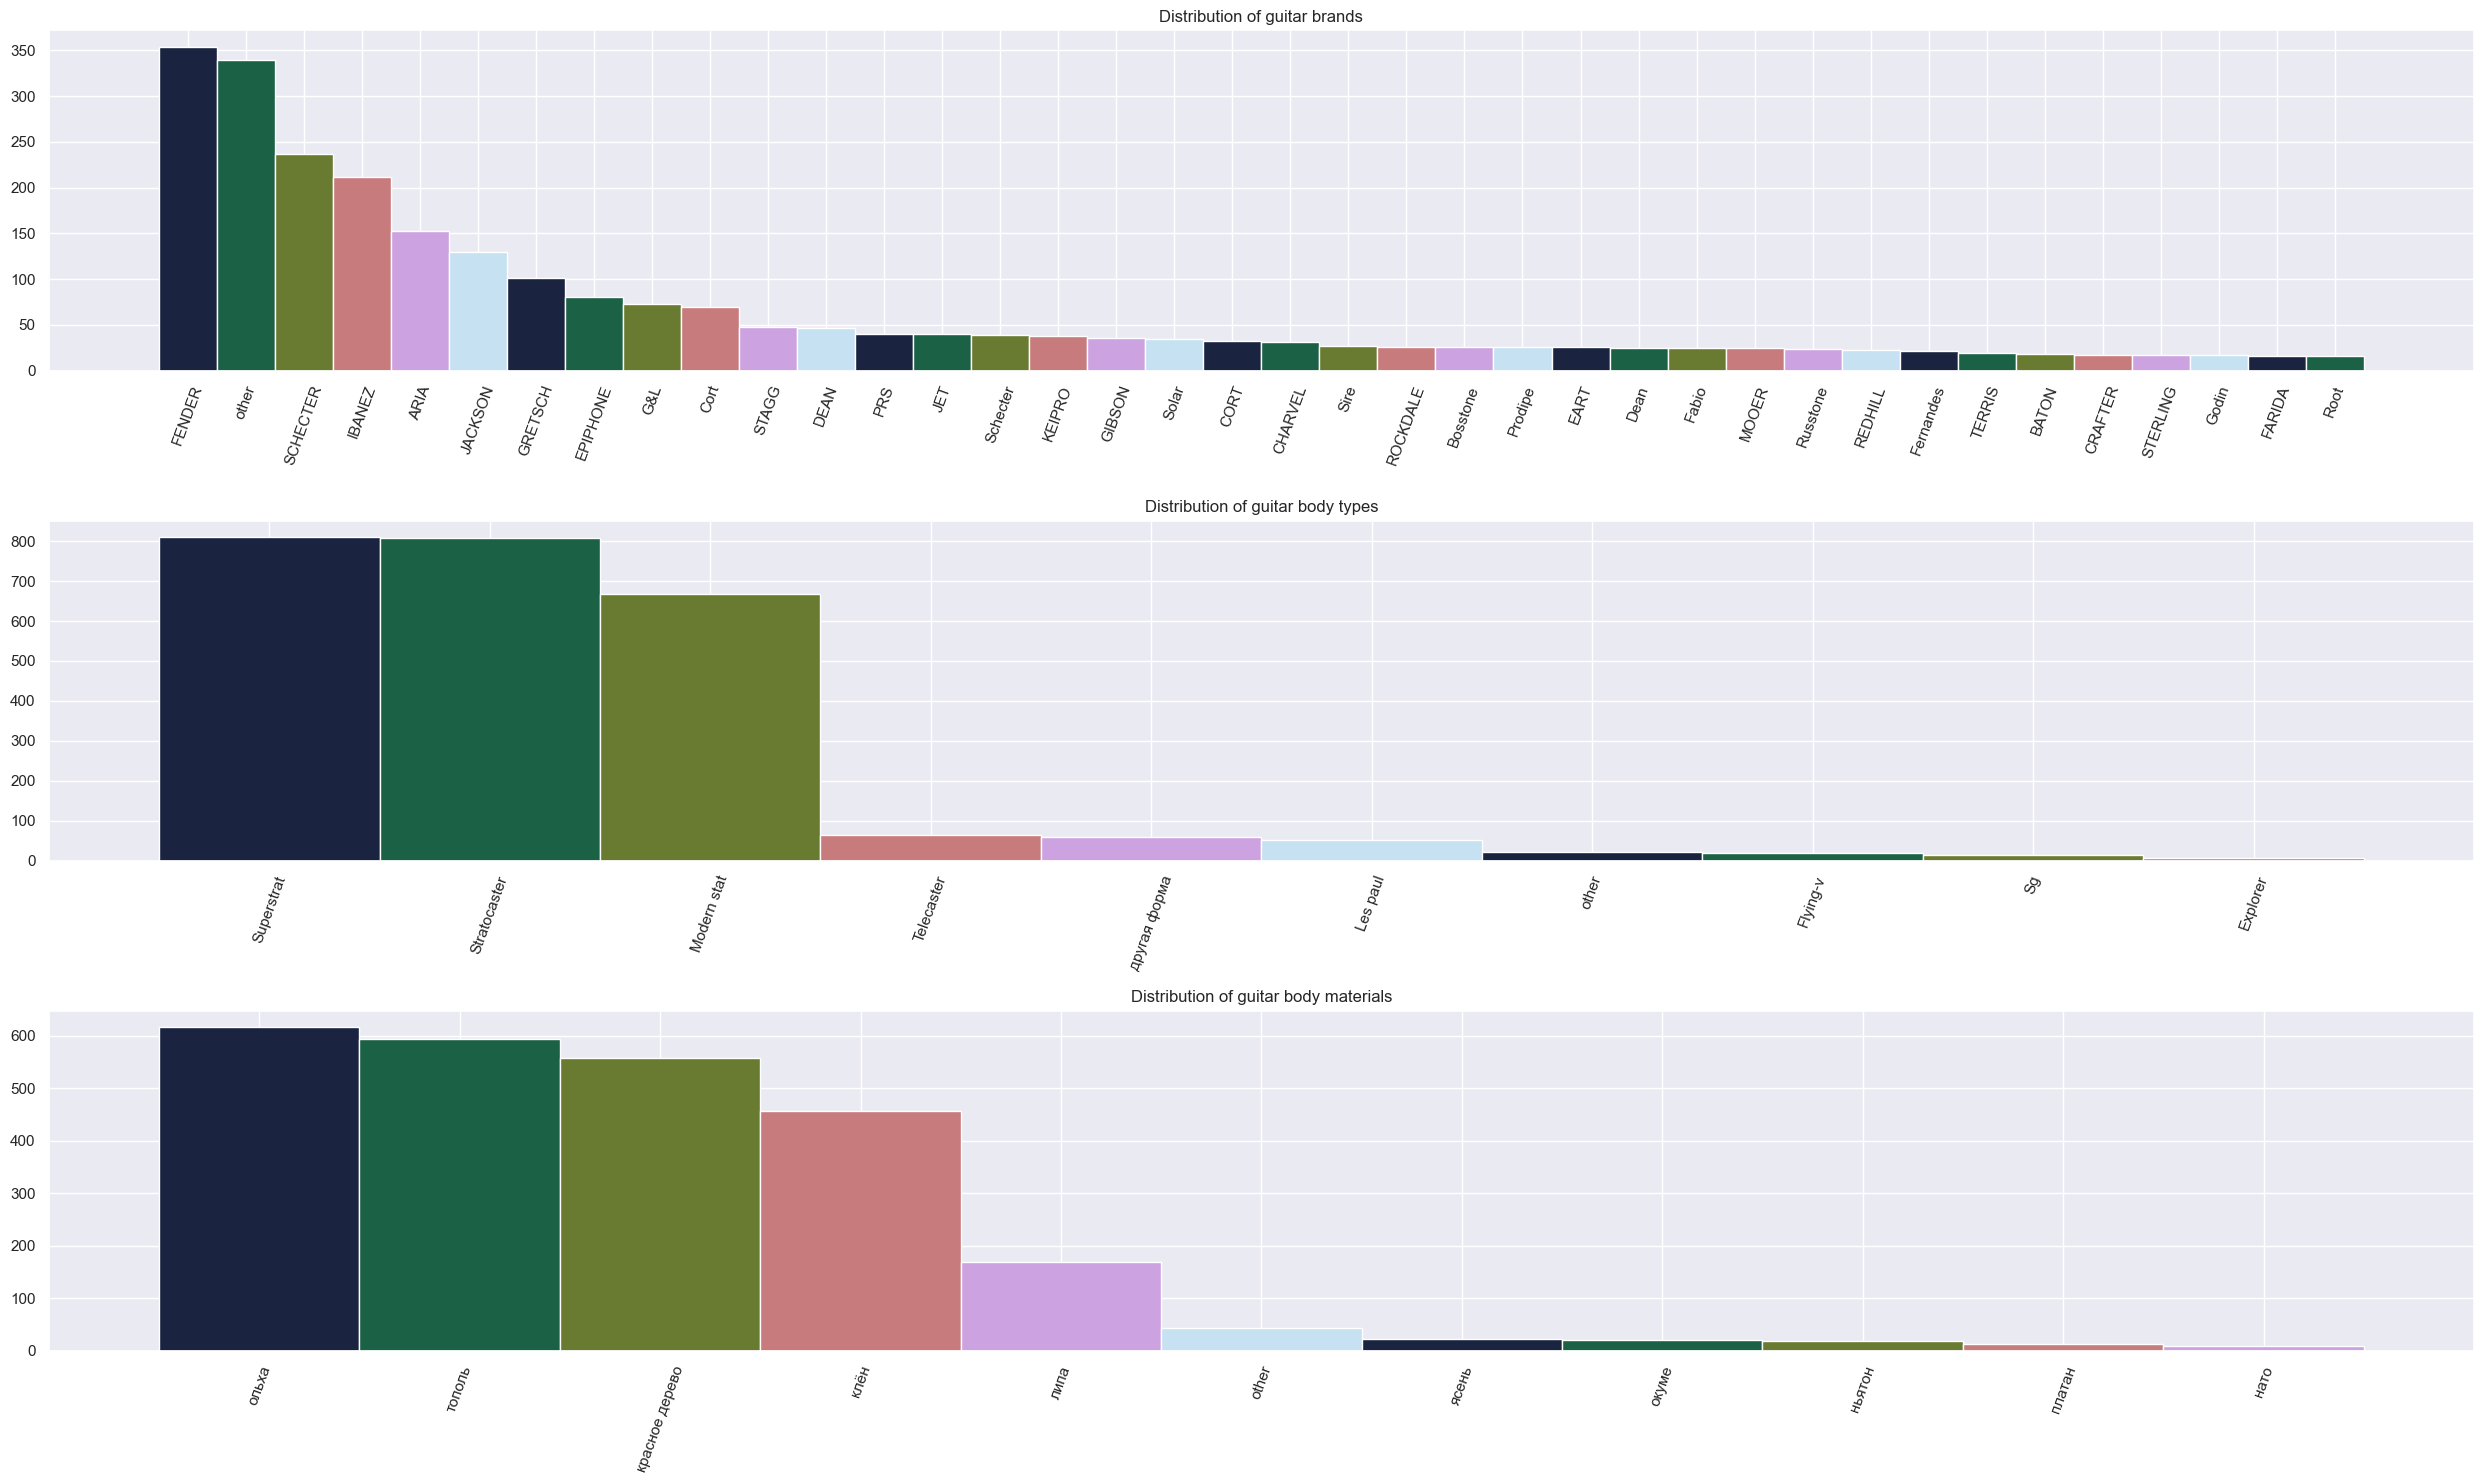

In [178]:
subplot_name = ['Distribution of guitar brands', 'Distribution of guitar body types', 'Distribution of guitar body materials']

arr_names = (BRANDS, BODIES, BODY_MATERIALS)
arr_counts = (brand_counts, body_counts, body_material_counts)

n = 1
indx = 0

sns.set(rc={'figure.figsize': (25, 15)})

for i in range(3):
    plt.subplot(3, 1, n)
    plt.bar(arr_names[i], arr_counts[i], color=sns.color_palette('cubehelix'), width=1, align='center')
    plt.title(subplot_name[i])
    plt.xticks(rotation=70)
    plt.tight_layout()

    n += 1
    indx += 1

plt.show()

In [179]:
df_encoded = df.copy()
le = LabelEncoder()

In [180]:
df_encoded['brand'] = le.fit_transform(df['brand'])
df_encoded['body'] = le.fit_transform(df['body'])
df_encoded['body-material'] = le.fit_transform(df['body-material'])

df_encoded = df_encoded.drop(columns=['name'])

df_encoded

,brand,price,fret-amount,string-amount,scale,body,body-material
0,19,27.60,22,6,25.5,3,9
1,27,13.30,24,6,24.5,5,9
2,19,23.94,24,6,25.5,6,9
3,27,12.20,24,6,25.5,5,9
4,19,27.90,22,6,25.5,6,2
...,...,...,...,...,...,...,...
2523,17,84.00,22,6,26.5,6,9
2524,17,86.00,24,6,26.5,3,7
2525,17,86.00,24,6,24.5,5,9
2526,17,86.00,22,6,26.5,5,2


In [181]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2523 entries, 0 to 2527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          2523 non-null   int32  
 1   price          2523 non-null   float64
 2   fret-amount    2523 non-null   int64  
 3   string-amount  2523 non-null   int64  
 4   scale          2523 non-null   float64
 5   body           2523 non-null   int32  
 6   body-material  2523 non-null   int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 128.1 KB


In [182]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_encoded)

### Visualisation of the dataset

In [183]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

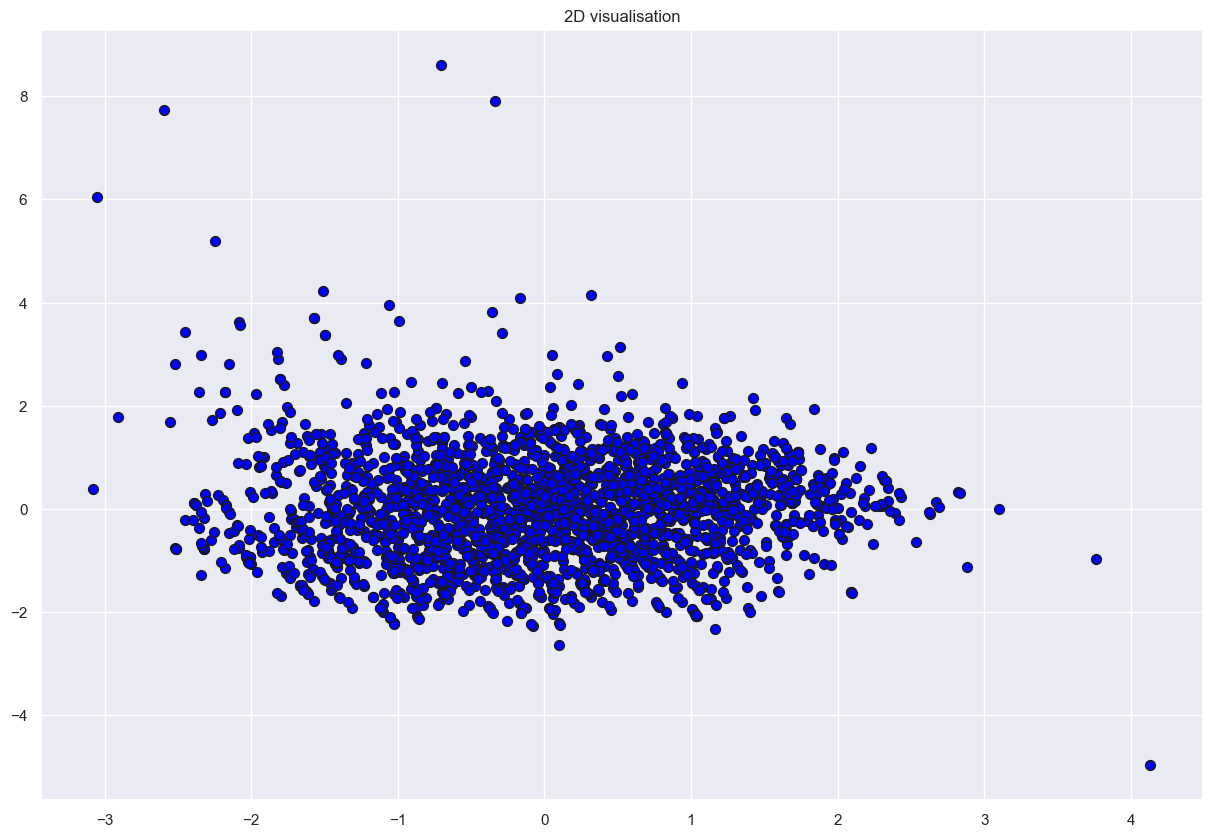

In [184]:
plt.figure(figsize=(15, 10))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.title('2D visualisation')
plt.grid(True)
plt.show()

# 

### Hyperparameter picking

Make function to calculate scoring depending on silhouette score while GridSearch

In [189]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

In [185]:
model = KMeans(random_state=42)

In [206]:
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15, 20, 25, 30],
    'max_iter': [100, 200, 300, 400, 500, 750, 1000],
    'tol': [0.0001, 0.001, 0.01]
}

In [207]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1, scoring=silhouette_scorer)

In [208]:
grid_search.fit(df_normalized)

GridSearchCV(cv=5, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500, 750, 1000],
                         'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_init': [5, 10, 15, 20, 25, 30],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring=<function silhouette_scorer at 0x000002636225D800>)

In [210]:
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(best_model)
print(f"Best silhouette: {best_score}")

KMeans(init='random', max_iter=100, n_clusters=12, n_init=30, random_state=42,
       tol=0.01)
Best silhouette: 0.23286422578743643


## 

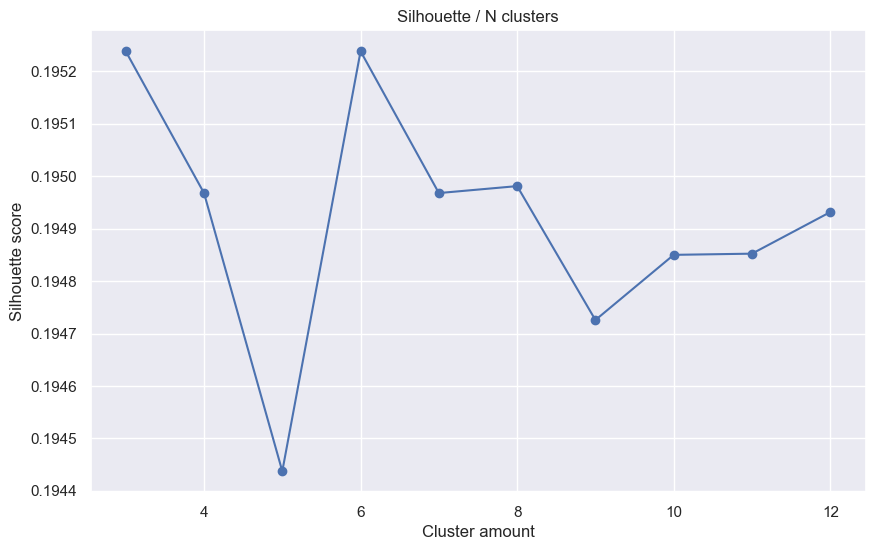

In [211]:
silhouette_scores = [grid_search.cv_results_['mean_test_score'][i] for i in range(len(param_grid['n_clusters']))]

plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_clusters'], silhouette_scores, marker='o')
plt.title('Silhouette / N clusters')
plt.xlabel('Cluster amount')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

### 

Make clusters and use PCA to transfrom multidimensional data to 2d

In [225]:
df_imported_clusters = df_encoded.copy()

df_imported_clusters['cluster'] = best_model.labels_

In [226]:
pca_imported = PCA(n_components=2)
principal_components_imported = pca.fit_transform(df_imported_clusters)

In [227]:
pca_df_imported = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df_imported['cluster'] = df_imported_clusters['cluster']

pca_df_imported

,PC1,PC2,cluster
0,0.892710,0.038159,9.0
1,-0.160190,-0.336025,3.0
2,0.712955,-0.445262,0.0
3,0.193710,-0.776872,3.0
4,0.363473,-0.731336,2.0
...,...,...,...
2518,2.008586,-0.490508,3.0
2519,-0.089788,0.057216,2.0
2520,0.089762,0.638729,11.0
2521,0.450455,-0.539295,0.0


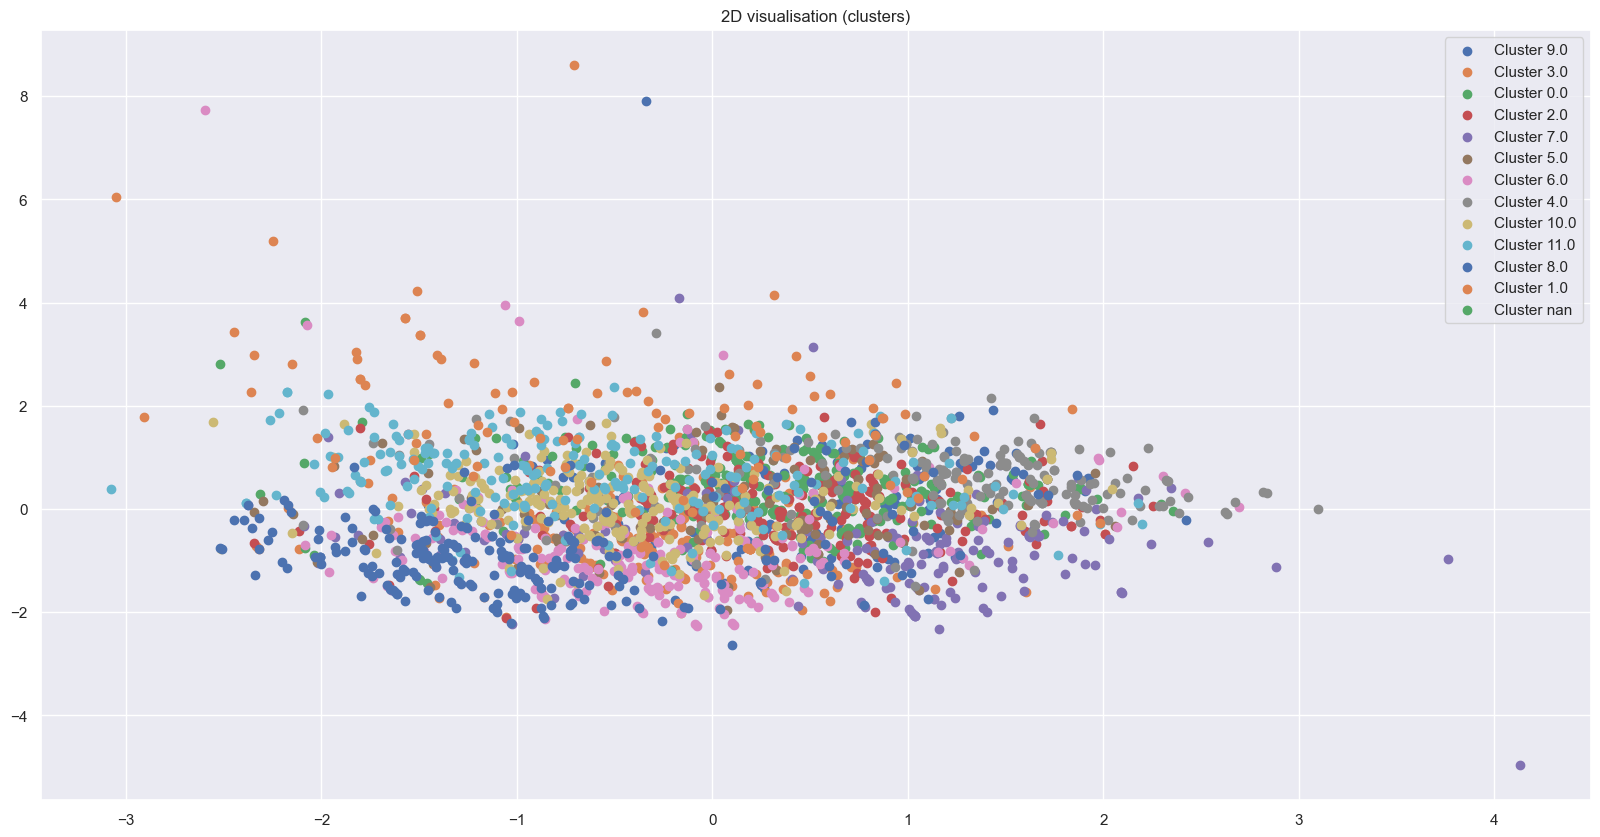

In [228]:
plt.figure(figsize=(20, 10))
for cluster in pca_df_imported['cluster'].unique():
    cluster_data = pca_df_imported[pca_df_imported['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('2D visualisation (clusters)')
plt.legend()
plt.grid(True)
plt.show()

# 

### My own realisation of KMeans clusterization

In [218]:
class KMeansClusterizator:
    def __init__(self, max_iter, n_clusters, n_init, tol):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.n_init = n_init
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            self.labels = self._assign_labels(X)
            new_centroids = self._compute_centroids(X)

            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def _assign_labels(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(X.shape[0]):
            for j in range(self.n_clusters):
                distances[i, j] = np.linalg.norm(X[i] - self.centroids[j])
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[self.labels == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)
        return centroids

    def predict(self, X):
        return self._assign_labels(X)

In [248]:
my_model = KMeansClusterizator( max_iter=100, n_clusters=12, n_init=30, tol=0.01)

In [249]:
my_model.fit(df_normalized)

In [250]:
my_labels = my_model.predict(df_normalized)

In [252]:
my_pca = PCA(n_components=2)
my_principal_components = pca.fit_transform(my_df_clusters)

In [253]:
my_pca_df = pd.DataFrame(data=my_principal_components, columns=['PC1', 'PC2'])
my_pca_df['cluster'] = my_labels

my_pca_df

,PC1,PC2,cluster
0,-70.477623,-1.264856,1
1,-84.841876,6.594658,10
2,-74.142164,-1.316053,3
3,-85.941833,6.588745,10
4,-70.184946,-1.196762,7
...,...,...,...
2518,-14.066802,-2.874269,1
2519,-12.068984,-2.831092,4
2520,-12.069092,-2.869591,10
2521,-12.071732,-2.774687,7


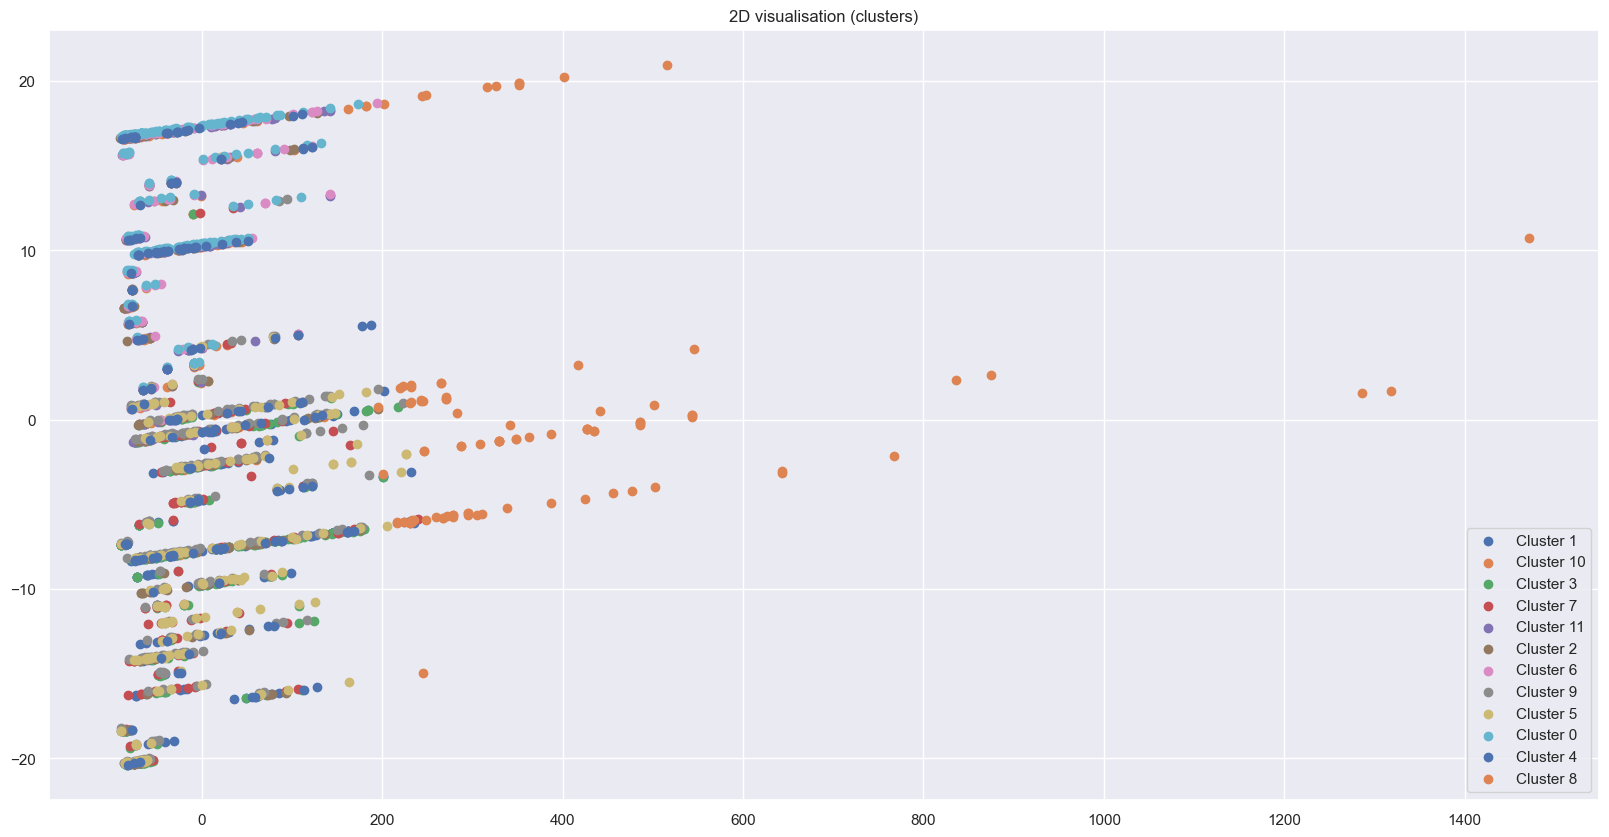

In [254]:
plt.figure(figsize=(20, 10))
for cluster in my_pca_df['cluster'].unique():
    cluster_data = my_pca_df[my_pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('2D visualisation (clusters)')
plt.legend()
plt.grid(True)
plt.show()

# 

### Compare imported score and my score

Imported

In [269]:
silhouette_avg = silhouette_score(df_normalized, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.20540249872358626


My own

In [251]:
silhouette_avg = silhouette_score(df_normalized, my_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.20951250894330728
